# Exercises: Random Variables
By Christopher van Hoecke, Max Margenot, and Delaney Mackenzie

## Lecture Link : 
https://www.quantopian.com/lectures/random-variables

### IMPORTANT NOTE: 
This lecture corresponds to the Random Variables lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts

In [33]:
# Useful Functions
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples
    
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples
    
def factorial(n):return reduce(lambda x,y:x*y,[1]+range(1,n+1))

In [24]:
# Useful Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools

from __future__ import division

---

# Exercise 1 : Uniform Distribution
- Plot the histogram of 10 tosses with a fair coin (let 1 be heads and 2 be tails).  
- Plot the histogram of 1000000 tosses of a fair coin 

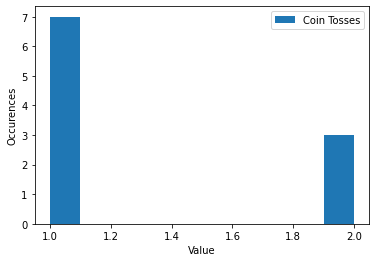

In [17]:
# Histograms with 10 tosses. 

## Your code goes here
Coin = DiscreteRandomVariable(1, 3)
plt.hist((Coin.draw(10)))

plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Coin Tosses']);

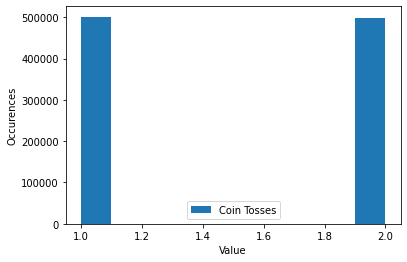

In [18]:
# Histograms with 1000000 tosses. 

## Your code goes here
plt.hist((Coin.draw(1000000)))

plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Coin Tosses']);

---

# Exercise 2 :  Binomial Distributions.
- Graph the histogram of 1000000 samples from a binomial distribution of probability 0.25 and $n = 20$
- Find the value that occurs the most often
- Calculate the probability of the value that occurs the most often occurring. *Use the factorial(x) function to find factorials*

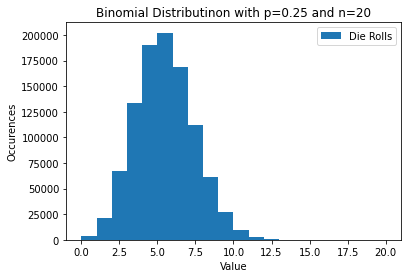

In [44]:
# Binomial distribution with p=0.25 and n=20

p=0.25
n=20

## Your code goes here. 
Coin = BinomialRandomVariable(n, p)
bins = np.arange(0,21,1)
n, bins, patches = plt.hist(Coin.draw(1000000), bins=bins)

plt.title('Binomial Distributinon with p=0.25 and n=20')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

In [45]:
# Finding x which occurs most often

## Your code goes here
e = np.argmax(n)
print('Maximum occurance for x =', elem)

Maximum occurance for x = 5


In [47]:
# Calculating the probability of finding x. 

## Your code goes here
combinations = factorial(n)/(factorial(n-e)*factorial(e))
probability = (p**x) * ((1-p)**(n-x))
print(combinations*probability)

NameError: name 'reduce' is not defined

---

# Exercise 3 : Normal Distributions
## a. Graphing
Graph a normal distribution using the Probability Density Function bellow, with a mean of 0 and standard deviation of 5. 

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

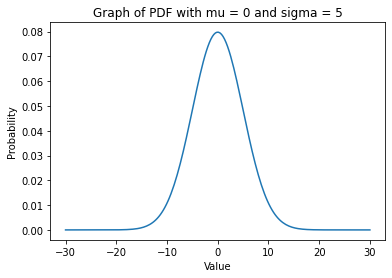

In [48]:
# Graphin a normal distribution pdf. 

## Your code goes here

mu = 0
sigma = 5
x = np.linspace(-30, 30, 200)
y = (1/(sigma * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu)*(x - mu) / (2 * sigma * sigma))
plt.plot(x, y)
plt.title('Graph of PDF with mu = 0 and sigma = 5')
plt.xlabel('Value')
plt.ylabel('Probability');

## b. Confidence Intervals. 
- Calculate the first, second, and third confidence intervals. 
- Plot the PDF and the first, second, and third confidence intervals. 

In [ ]:
# finding the 1st, 2nd, and third confidence intervals. 

## Your code goes here

first_ci =
second_ci =
third_ci = 

print '1-sigma -> mu +/-', sigma
print '2-sigma -> mu +/-', second_ci[1]
print '3-sigma -> mu +/-', third_ci[1]

In [ ]:
## Graphing.

## Your code goes here. 

plt.title('Graph of PDF with 3 confidence intervals.')
plt.legend();

---

# Exercise 4: Financial Applications: 
Fit the returns of SPY from 2016-01-01 to 2016-05-01 to a normal distribution. 
- Fit the returns to a normal distribution by clacluating the values of $\mu$ and $\sigma$
- Plot the returns and the distribution, along with 3 confidence intervals. 
- Use the Jarque-Bera test to check for normality. 

In [ ]:
# Collect prices and retursn. 
prices = get_pricing('SPY', start_date = '2016-01-01', end_date='2016-05-01', 
                     fields = 'price')
returns = prices.pct_change()[1:]

In [ ]:
# Calculating the mean and standard deviation. 

## Your code goes here
sample_mean =
sample_std_dev = 

x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/(sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))

In [ ]:
# Plotting histograms and confidence intervals. 

## Your code goes here

plt.title('Graph of returns with fitted PDF and the 3 confidence intervals. ')
plt.legend();

In [ ]:
# Run the JB test for normality. 

## Your code goes here


print "The JB test p-value is: ", p_value
print "We reject the hypothesis that the data are normally distributed ", p_value < cutoff
print "The skewness of the returns is: ", skewness
print "The kurtosis of the returns is: ", kurtosis

---

Congratulations on completing the Random Variables exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*